In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sleep = pd.read_csv(r'C:\Users\Joseph\OneDrive\Desktop\Data Science\MSDS670-Data-Visualization\Week 5\Sleep_health_and_lifestyle_dataset.csv', index_col=0)
sleep.sample(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,,,
75,Male,33,Doctor,6.0,6,30,8,72,5000
104,Male,36,Teacher,6.6,5,35,7,74,4800
87,Male,35,Engineer,7.2,8,60,4,65,5000
242,Male,44,Salesperson,6.3,6,45,7,72,6000
262,Female,45,Teacher,6.6,7,45,4,65,6000
124,Female,37,Accountant,7.2,8,60,4,68,7000
29,Male,30,Doctor,7.9,7,75,6,70,8000
129,Male,38,Lawyer,7.3,8,60,5,68,8000
142,Male,38,Lawyer,7.1,8,60,5,68,8000


In [11]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   Heart Rate               374 non-null    int64  
 8   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.2+ KB


In [13]:
occ_sleep = sleep.groupby('Occupation')['Quality of Sleep'].mean()
occ_sleep

Occupation
Accountant              7.891892
Doctor                  6.647887
Engineer                8.412698
Lawyer                  7.893617
Manager                 7.000000
Nurse                   7.369863
Sales Representative    4.000000
Salesperson             6.000000
Scientist               5.000000
Software Engineer       6.500000
Teacher                 6.975000
Name: Quality of Sleep, dtype: float64

In [15]:
# reset index to convert the grouped result to a DataFrame
occ_sleep = occ_sleep.reset_index()

In [17]:
# change Sales Representative to Sales Rep
occ_sleep['Occupation'] = occ_sleep['Occupation'].replace("Sales Representative", "Sales Rep")

C:\Users\Joseph\AppData\Local\Temp\ipykernel_12552\614403687.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(occ_sleep['Occupation'], rotation=80)


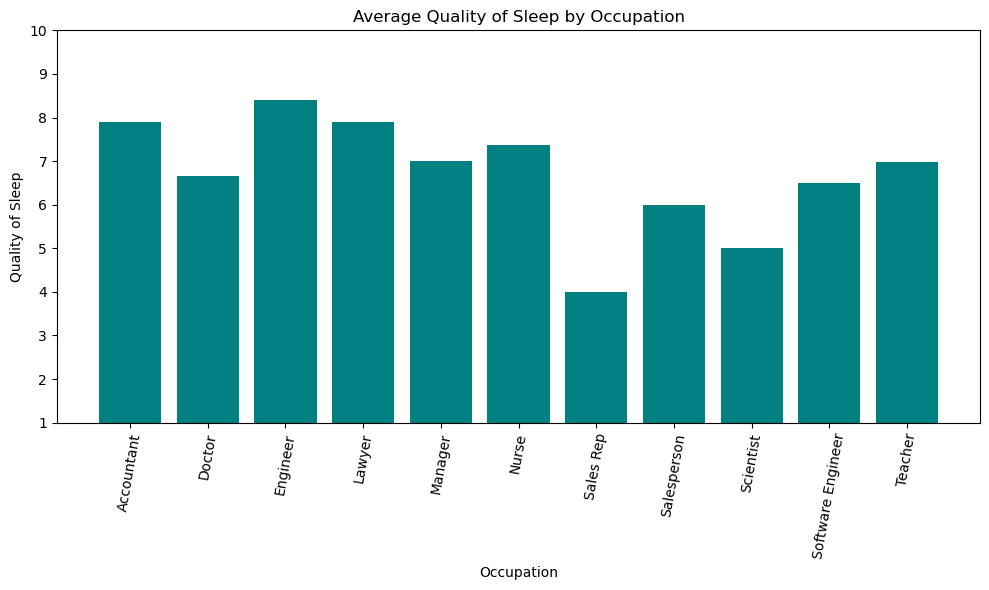

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(occ_sleep['Occupation'], occ_sleep['Quality of Sleep'], color='teal')
ax.set_xticklabels(occ_sleep['Occupation'], rotation=80)
ax.set_ylim(1, 10)
ax.set_title('Average Quality of Sleep by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Quality of Sleep')
plt.tight_layout()
plt.show()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_12552\1977601249.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=genders)


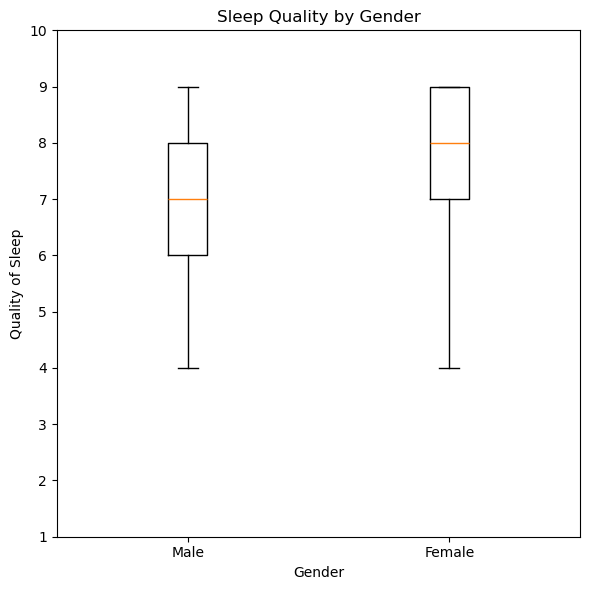

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
genders = sleep['Gender'].unique()
data = [sleep[sleep['Gender'] == gender]['Quality of Sleep'] for gender in genders]
ax.boxplot(data, labels=genders)
ax.set_ylim(1, 10)
ax.set_title('Sleep Quality by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Quality of Sleep')
plt.tight_layout()
plt.show()

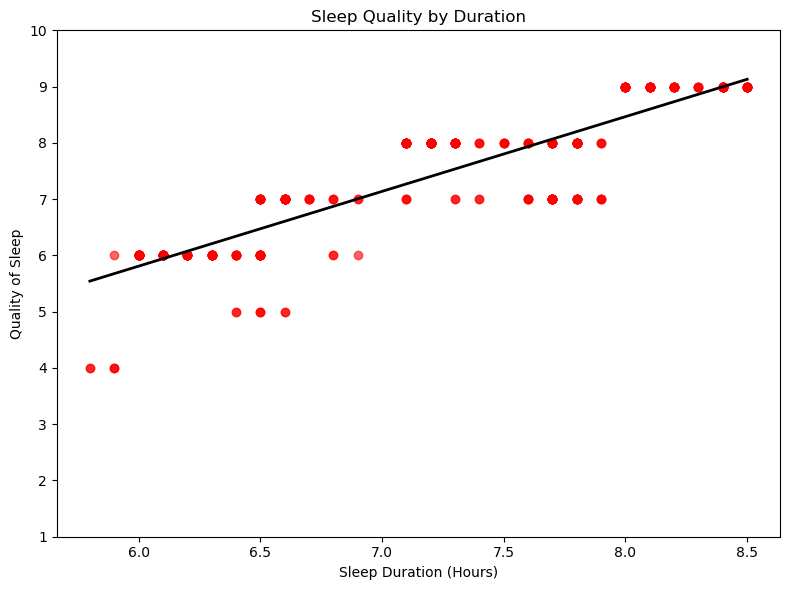

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(sleep['Sleep Duration'], sleep['Quality of Sleep'], color='red', alpha=0.6)
x = sleep['Sleep Duration']
y = sleep['Quality of Sleep']
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b
ax.plot(x_line, y_line, color='black', linewidth=2)
ax.set_ylim(1, 10)
ax.set_title('Sleep Quality by Duration')
ax.set_xlabel('Sleep Duration (Hours)')
ax.set_ylabel('Quality of Sleep')
plt.tight_layout()
plt.show()